In [69]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

def quantile_morphing(x, y):
    """
    Applies quantile morphing to two distributions to map one into the other.
    
    Parameters:
    x (numpy array): Values from the original distribution.
    y (numpy array): Values from the target distribution.
    
    Returns:
    numpy array: The morphed distribution.
    """
    assert len(x) == len(y), "Both distributions should have the same length."
    
    # Compute the quantiles for each distribution
    p = np.linspace(0, 100, 101)
    x_perc = np.percentile(x, p)
    y_perc = np.percentile(y, p)

    # Interpolate the quantiles
    cdf_x = interp1d(x_perc, p/100, kind='linear', fill_value='extrapolate')
    cdf_y = interp1d(y_perc, p/100, kind='linear', fill_value='extrapolate')
    inv_cdf_y = interp1d(p/100, y_perc, kind='linear', fill_value='extrapolate')
    
    # Apply the transformation
    morphed = inv_cdf_y(cdf_x(x))
    
    return morphed, cdf_x, cdf_y, inv_cdf_y

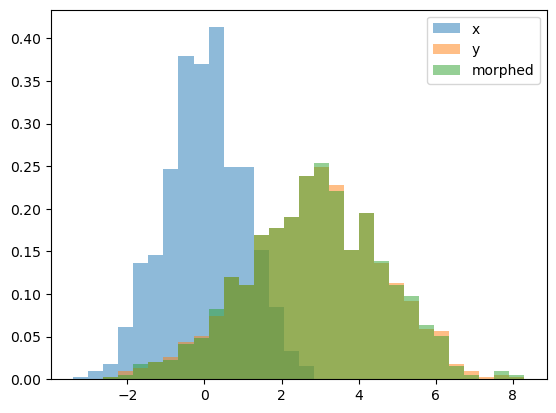

In [70]:
# Generate two random distributions (normal with different means and standard deviations)
x = np.random.normal(0, 1, 1000)
y = np.random.normal(3, 1.8, 1000)

morphed, cdf_x, cdf_y, inv_cdf_y  = quantile_morphing(x, y)

# Plot the original distributions and the morphed one
mn = min(np.min(x), np.min(y), np.min(morphed))
mx = max(np.max(x), np.max(y), np.max(morphed))
plt.hist(x, bins=30, alpha=0.5, label='x', density=True, range=(mn, mx))
plt.hist(y, bins=30, alpha=0.5, label='y', density=True, range=(mn, mx))
plt.hist(morphed, bins=30, alpha=0.5, label='morphed', density=True, range=(mn, mx))
plt.legend()
plt.show()

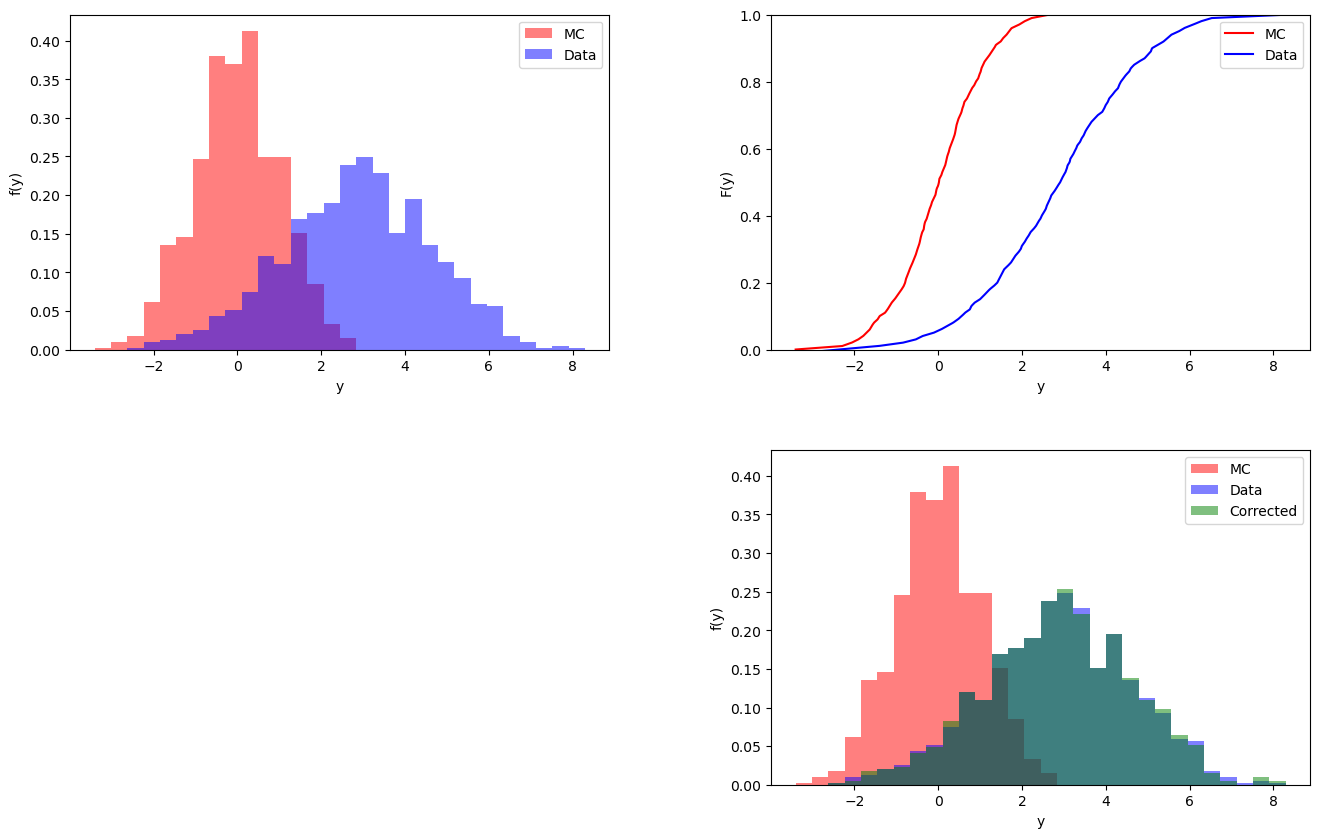

In [78]:
# figure with 4 subplots
nbins = 30

# create a GridSpec object to specify the subplot arrangement
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, width_ratios=[1, 1], height_ratios=[1, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[1, 1])

# adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# set the title and show the figure
ax1.hist(x, bins=nbins, alpha=0.5, label='MC', density=True, range=(mn, mx), color='red');
ax1.hist(y, bins=nbins, alpha=0.5, label='Data', density=True, range=(mn, mx), color='blue');
ax1.legend();
ax1.set_xlabel('y');
ax1.set_ylabel('f(y)');
x_cdfs = np.linspace(mn, mx, 1000)
ax2.plot(x_cdfs, cdf_x(x_cdfs), label='MC', color='red');
ax2.plot(x_cdfs, cdf_y(x_cdfs), label='Data', color='blue');
ax2.legend();
ax2.set_xlabel('y');
ax2.set_ylabel('F(y)');
ax2.set_ylim(0, 1);
ax3.hist(x, bins=nbins, alpha=0.5, label='MC', density=True, range=(mn, mx), color='red');
ax3.hist(y, bins=nbins, alpha=0.5, label='Data', density=True, range=(mn, mx), color='blue');
ax3.hist(morphed, bins=nbins, alpha=0.5, label='Corrected', density=True, range=(mn, mx), color='green');
ax3.legend();
ax3.set_xlabel('y');
ax3.set_ylabel('f(y)');
plt.show()
fig.tight_layout()
fig.savefig('qreg.pdf')